# Median of Means (MoM) estimator 

We have a sample $X_1,...,X_n$ where $n=km$, and $k,m$ are some positive integers. The MoM estimator of $\mu = \mathbb{E}X$ is defined as

$$\hat{\mu} = \text{median}\left(\frac{1}{k}\sum_{i=1}^kX_i,\frac{1}{k}\sum_{i=k+1}^{2k}X_i,...,\frac{1}{k}\sum_{i=k(m-1)+1}^{n}X_i\right).$$

In [1]:
import numpy as np 
from scipy.stats import t
import matplotlib.pyplot as plt
import pandas as pd
import os
np.random.seed(12345)

In [12]:
def MoM(x,k):
    '''
    MoM estimator with data x.
    k is the number of groups. 
    '''
    means = []
    for y in np.split(x,k):
        means.append(y.mean())
    return np.median(y)

In [13]:
k = 10 #number of groups
m = np.arange(5,500,2) #number of members per group
ns = k*m #sample size
x_bar = []
mom = []
for n in ns: 
    x = t.rvs(df=1.5, size=n)
    x_bar.append(x.mean())
    mom.append(MoM(x,k))

[]

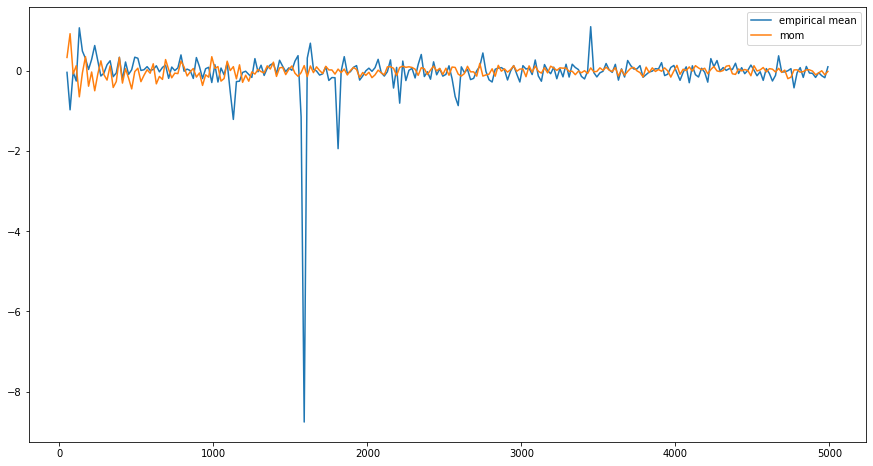

In [14]:
plt.figure(figsize=[15,8])
plt.plot(ns,x_bar,label='empirical mean')
plt.plot(ns,mom,label='mom')
plt.legend()
plt.plot()

In [15]:
data = pd.read_csv('ENIGH.csv')

In [28]:
sueldos = data['sueldos']
print(sueldos.mean())
print(MoM(sueldos,17))
print(np.median(sueldos))

22095.312089837313
12913.04
15513.81
